# Install rdkit

using pypi or whatever install rdkit


In [12]:
# conda install -c conda-forge rdkit

## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [1]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import Draw
import rdkit.Chem as Chem

# 1. Create the paracetamol molecule from its SMILES
paracetamol_smile = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol = MolFromSmiles(paracetamol_smile)
# 2.
Draw.MolToImage(paracetamol)
# 3.
print(paracetamol.GetNumAtoms(), "atoms")
# Hydrogen atoms are not shown in the visualization and not counted in the number of atoms
# 4.
print([atom.GetSymbol() for atom in paracetamol.GetAtoms()])
# 5.
print(paracetamol.GetNumBonds(), "bonds")

11 atoms
['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C']
11 bonds


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
the following url: https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [2]:
from rdkit.Chem import SDMolSupplier
from rdkit.Chem import AllChem
# 2
suppl = SDMolSupplier("DB00295.sdf")
morphine = suppl[0]
# 3
fp = AllChem.GetMorganFingerprintAsBitVect(morphine, 2)
fp

[21:37:47] DEPRECATION WARNING: please use MorganGenerator


## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [3]:
import numpy as np
from rdkit import DataStructs
from rdkit.DataStructs import DiceSimilarity

def smiles_to_np_morganfingerprinting(smile):
    mol = MolFromSmiles(smile)
    fpgen = AllChem.GetMorganGenerator(radius=2)
    fp = fpgen.GetSparseCountFingerprint(mol)
    return fp

# 1
paracetamol_smile = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol_fp = smiles_to_np_morganfingerprinting(paracetamol_smile)

# 2
aspirin_smile = "CC(=O)OC1=CC=CC=C1C(O)=O"
aspirin_fp = smiles_to_np_morganfingerprinting(aspirin_smile)

# 3
DiceSimilarity(aspirin_fp, paracetamol_fp)

0.4307692307692308

## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [4]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

paracetamol_mol = MolFromSmiles(paracetamol_smile)
descriptor_names = [x[0] for x in Descriptors._descList]
descriptor_fvalues = MolecularDescriptorCalculator(descriptor_names)
values = descriptor_fvalues.CalcDescriptors(paracetamol_mol)
descriptors_dict = dict(zip(descriptor_names, values))
descriptors_dict

{'MaxAbsEStateIndex': 10.524468537414966,
 'MaxEStateIndex': 10.524468537414966,
 'MinAbsEStateIndex': 0.11510204081632636,
 'MinEStateIndex': -0.11510204081632636,
 'qed': 0.5950261967780849,
 'SPS': 9.181818181818182,
 'MolWt': 151.165,
 'HeavyAtomMolWt': 142.093,
 'ExactMolWt': 151.063328528,
 'NumValenceElectrons': 58,
 'NumRadicalElectrons': 0,
 'MaxPartialCharge': 0.22074743631242583,
 'MinPartialCharge': -0.5079643157925783,
 'MaxAbsPartialCharge': 0.5079643157925783,
 'MinAbsPartialCharge': 0.22074743631242583,
 'FpDensityMorgan1': 1.3636363636363635,
 'FpDensityMorgan2': 1.9090909090909092,
 'FpDensityMorgan3': 2.3636363636363638,
 'BCUT2D_MWHI': 16.25468871437965,
 'BCUT2D_MWLOW': 10.280190859964755,
 'BCUT2D_CHGHI': 1.9280360590359853,
 'BCUT2D_CHGLO': -1.9945540738765868,
 'BCUT2D_LOGPHI': 2.12524757916018,
 'BCUT2D_LOGPLOW': -2.04401131261029,
 'BCUT2D_MRHI': 5.88095478459792,
 'BCUT2D_MRLOW': -0.11373578338266109,
 'AvgIpc': 1.9291266251851134,
 'BalabanJ': 2.736298072105

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

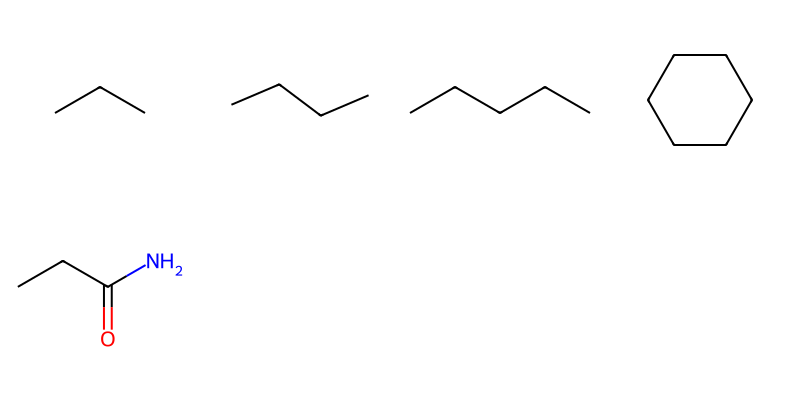

In [6]:
smiles_list = [ 'C', 'CC', 'CCC', 'CCCC', 'CCCCC', 'C1CCCCC1', 'CCC(=O)N' ]

# 1
selected_mols = [MolFromSmiles(smile) for smile in smiles_list]

# 2
pattern = "CCC"
tmr = Chem.MolFromSmarts(pattern)
ccc_mols = [mol for mol in selected_mols if mol.HasSubstructMatch(tmr)]


# 3
pattern = "C(=O)N"
tmr = Chem.MolFromSmarts(pattern)
con_mols = [mol for mol in selected_mols if mol.HasSubstructMatch(tmr)]
Chem.Draw.MolsToGridImage(ccc_mols, molsPerRow=4) # 5

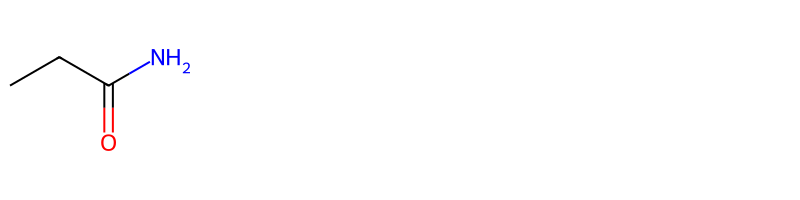

In [7]:
Chem.Draw.MolsToGridImage(con_mols, molsPerRow=4) # only 1

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from the following link: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf.


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [62]:
# 1
# !wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

In [8]:
# 2
molecule_list = SDMolSupplier("solubility.train.sdf", removeHs=False)
print(len(molecule_list), "molecules")

# 3
def calculate_descriptors(mol):
    descriptor_names = [x[0] for x in Descriptors._descList]
    descriptor_fvalues = MolecularDescriptorCalculator(descriptor_names)
    values = descriptor_fvalues.CalcDescriptors(mol)
    descriptors_dict = dict(zip(descriptor_names, values))
    return descriptors_dict
# 4
import pandas as pd

df = []
for mol in molecule_list:
    if mol is not None:
        df.append(calculate_descriptors(mol))

df = pd.DataFrame(df)
df.head()

1025 molecules


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,2.211806,1.343750,1.343750,0.468786,8.4,72.151,60.055,72.09390,32,...,0,0,0,0,0,0,0,0,2,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,24.0,70.135,60.055,70.07825,30,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,2.231806,1.355000,1.355000,0.462954,9.0,86.178,72.066,86.10955,38,...,0,0,0,0,0,0,0,0,3,0
3,2.253472,2.253472,0.898148,0.898148,0.483890,10.0,86.178,72.066,86.10955,38,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,2.243056,0.541667,0.541667,0.424482,12.0,86.178,72.066,86.10955,38,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'Solubility')

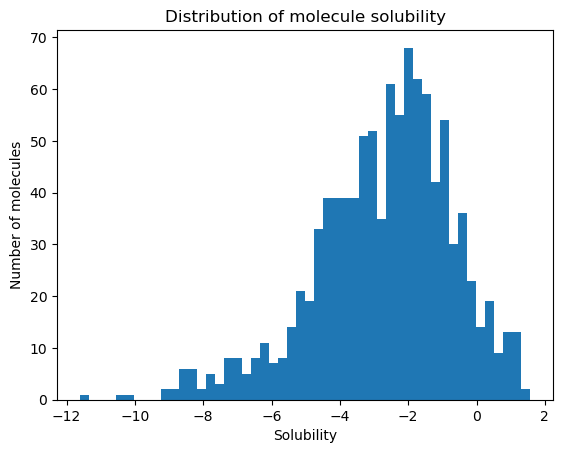

In [9]:
# 5
labels = [float(mol.GetProp("SOL")) for mol in molecule_list if mol is not None]
df['labels'] = labels

# 6
import matplotlib.pyplot as plt
plt.hist(labels, bins=50)
plt.title("Distribution of molecule solubility")
plt.ylabel("Number of molecules")
plt.xlabel("Solubility")

Looks like the solubility of molecules is normally distributed.

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [11]:
# 1
print(f"There is {int(df.isna().sum().sum())} missing NaN values in the dataset")
df_no_nan = df.dropna()
print(f"There is {int(df_no_nan.isna().sum().sum())} missing NaN values in the dataset after removing them. (0 expected)")

# 2
labels = df_no_nan['labels']
df_no_nan = df_no_nan.drop(columns=['labels'])

# MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_no_nan)
df_scaled = pd.DataFrame(df_scaled, columns=df_no_nan.columns)

# 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42)

# 4
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# 4
lin_reg_pred = lin_reg.predict(X_test)
rf_reg_pred = rf_reg.predict(X_test)

lin_rmse = np.sqrt(np.mean((lin_reg_pred - y_test) ** 2))
rf_rmse = np.sqrt(np.mean((rf_reg_pred - y_test) ** 2))

print(f"Root Mean Squared Error of linear regression: {lin_rmse:.2f}")
print(f"Root Mean Squared Error of random forest: {rf_rmse:.2f}")

There is 12 missing NaN values in the dataset
There is 0 missing NaN values in the dataset after removing them. (0 expected)
Root Mean Squared Error of linear regression: 0.67
Root Mean Squared Error of random forest: 0.65


## Ex6.III Prepare data for test  and test model


1. Download file from : https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [173]:
# 1
# !wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

In [25]:
# 2
list_molecule_test = SDMolSupplier("solubility.test.sdf", removeHs=False)

# 3
df_test = []
for mol in list_molecule_test:
    if mol is not None:
        df_test.append(calculate_descriptors(mol))

df_test = pd.DataFrame(df_test)

# 4
df_test_scaled = scaler.transform(df_test)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test.columns)

test_labels = [float(mol.GetProp("SOL")) for mol in list_molecule_test if mol is not None]

# 5
y_pred_test = lin_reg.predict(df_test_scaled)

# 6
rmse_test = np.sqrt(np.mean((y_pred_test - test_labels) ** 2))
print(f"Root Mean Squared Error on the test set: {rmse_test:.2f}")

Root Mean Squared Error on the test set: 1.16


In [26]:
test_labels[:10], y_pred_test[:10]

([-3.68, -4.26, -2.68, -2.59, -2.09, -2.15, -3.66, -2.77, -3.4, -3.04],
 array([-3.36367612, -3.77454853, -2.62412389, -2.74519073, -1.49300597,
        -2.78724428, -3.51604537, -3.04817095, -3.42315173, -3.63980947]))